In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
results = pd.read_csv('results.csv')

In [4]:
non_nan_results = (
    results
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
)
non_nan_results_melted = (
    non_nan_results.melt(id_vars=['node_count', 'leaf_count', 'types_count', 'process_length', 'integrator', 'use_intervals', 'min_num_intervals', 'useRandomInitial'], var_name='type', value_name='value')
)
non_nan_durations = (
    non_nan_results
    .drop(columns=['bdmm_likelihood', 'flow_likelihood'])
    .melt(id_vars=['node_count', 'leaf_count', 'types_count', 'process_length', 'integrator', 'use_intervals', 'min_num_intervals', 'useRandomInitial'], var_name='algorithm', value_name='duration')
)

KeyError: "The following 'id_vars' are not present in the DataFrame: ['useRandomInitial']"

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No Intervals + No Random'),
  Text(1, 0, 'No Intervals + Random'),
  Text(2, 0, 'Intervals + No Random'),
  Text(3, 0, 'Intervals + Random')])

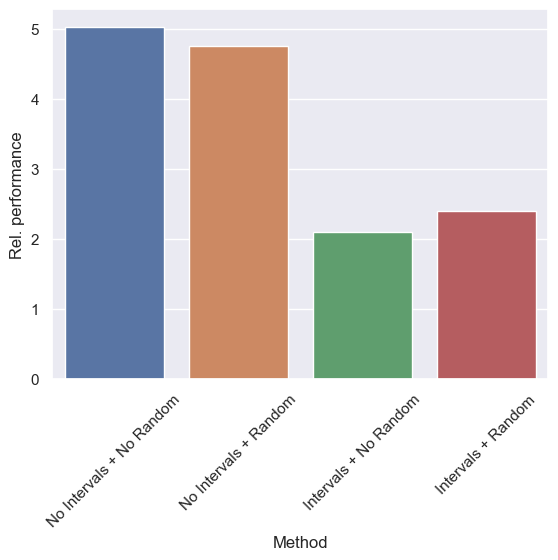

In [ ]:
sns.barplot(data=pd.DataFrame({
    "Method": [
        "No Intervals + No Random", 
        "No Intervals + Random", 
        "Intervals + No Random",
        "Intervals + Random",
    ],
    "Rel. performance": [
        non_nan_results[~non_nan_results["use_intervals"] & ~non_nan_results["useRandomInitial"]]["bdmm_duration"].sum() / non_nan_results[~non_nan_results["use_intervals"] & ~non_nan_results["useRandomInitial"]]["flow_duration"].sum(),
        non_nan_results[~non_nan_results["use_intervals"] & non_nan_results["useRandomInitial"]]["bdmm_duration"].sum() / non_nan_results[~non_nan_results["use_intervals"] & non_nan_results["useRandomInitial"]]["flow_duration"].sum(),
        non_nan_results[non_nan_results["use_intervals"] & ~non_nan_results["useRandomInitial"]]["bdmm_duration"].sum() / non_nan_results[non_nan_results["use_intervals"] & ~non_nan_results["useRandomInitial"]]["flow_duration"].sum(),
        non_nan_results[non_nan_results["use_intervals"] & non_nan_results["useRandomInitial"]]["bdmm_duration"].sum() / non_nan_results[non_nan_results["use_intervals"] & non_nan_results["useRandomInitial"]]["flow_duration"].sum(),
    ]
}), x="Method", y="Rel. performance")
plt.xticks(rotation=45)

In [ ]:
non_nan_results[non_nan_results["use_intervals"] & ~non_nan_results["useRandomInitial"]]["bdmm_duration"].sum() / \
    non_nan_results[non_nan_results["use_intervals"] & ~non_nan_results["useRandomInitial"]]["flow_duration"].sum()

2.094786006871648

In [ ]:
non_nan_results[(non_nan_results["leaf_count"] > 100) & non_nan_results["use_intervals"] & non_nan_results["useRandomInitial"]]["bdmm_duration"].sum() / \
    non_nan_results[(non_nan_results["leaf_count"] > 100)  & non_nan_results["use_intervals"] & non_nan_results["useRandomInitial"]]["flow_duration"].sum()

8.08478818971017

In [ ]:
non_nan_results[(non_nan_results["leaf_count"] > 100) & ~non_nan_results["use_intervals"] & ~non_nan_results["useRandomInitial"]]["bdmm_duration"].sum() / \
    non_nan_results[(non_nan_results["leaf_count"] > 100)  & ~non_nan_results["use_intervals"] & ~non_nan_results["useRandomInitial"]]["flow_duration"].sum()

7.835471957762929

In [ ]:
non_nan_results[(non_nan_results["leaf_count"] > 100) & ~non_nan_results["use_intervals"] & non_nan_results["useRandomInitial"]]["bdmm_duration"].sum() / \
    non_nan_results[(non_nan_results["leaf_count"] > 100)  & ~non_nan_results["use_intervals"] & non_nan_results["useRandomInitial"]]["flow_duration"].sum()

8.720368695288935

Text(0, 0.5, 'BDMM Log Likelihood')

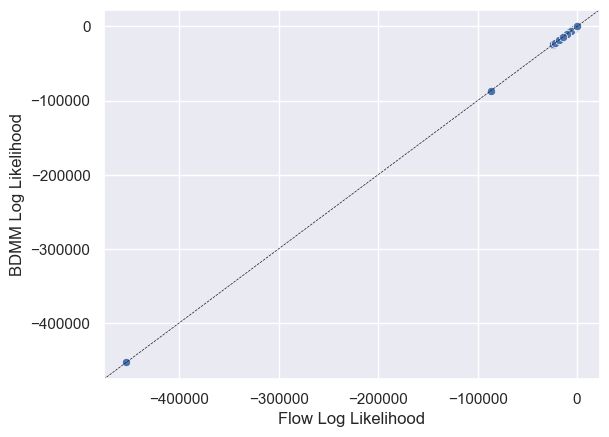

In [ ]:
ax = sns.scatterplot(non_nan_results, x="flow_likelihood", y="bdmm_likelihood")
ax.plot(ax.get_xlim(), ax.get_xlim(), linestyle='--', color='k', lw=0.5, scalex=False, scaley=False)

plt.xlabel('Flow Log Likelihood')
plt.ylabel('BDMM Log Likelihood')

Text(0, 0.5, 'Flow Duration (ns)')

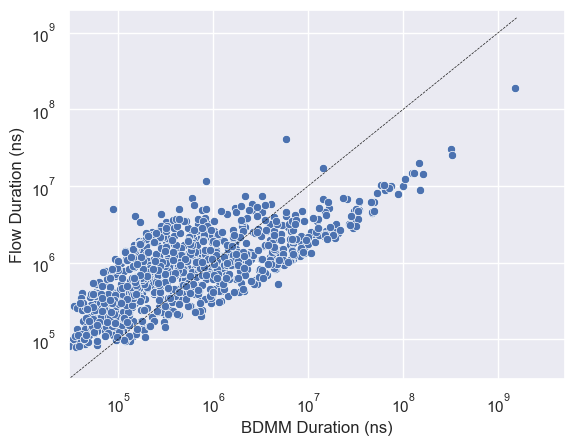

In [ ]:
ax = sns.scatterplot(non_nan_results, x="bdmm_duration", y="flow_duration")
ax.plot(ax.get_xlim(), ax.get_xlim(), linestyle='--', color='k', lw=0.5, scalex=False, scaley=False)

plt.xscale('log')
plt.yscale('log')

plt.xlim(3e4, 5e9)
plt.ylim(3e4, 2e9)

plt.xlabel('BDMM Duration (ns)')
plt.ylabel('Flow Duration (ns)')


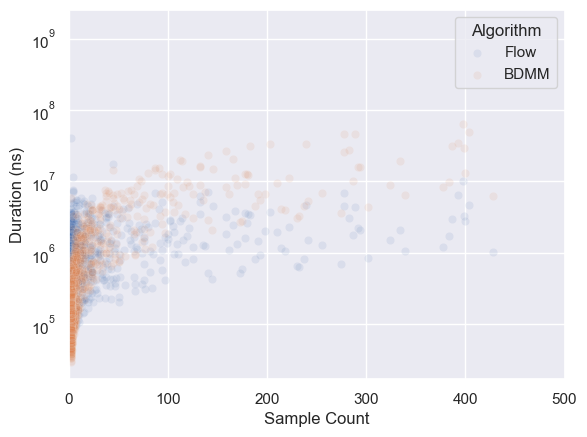

In [ ]:
sns.scatterplot(non_nan_results, x="leaf_count", y="flow_duration", alpha=0.1)
sns.scatterplot(non_nan_results, x="leaf_count", y="bdmm_duration", alpha=0.1)

plt.yscale('log')

plt.xlim(0, 500)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

plt.legend(labels=["Flow", "BDMM"], title="Algorithm")

Text(0, 0.5, 'Duration (ns)')

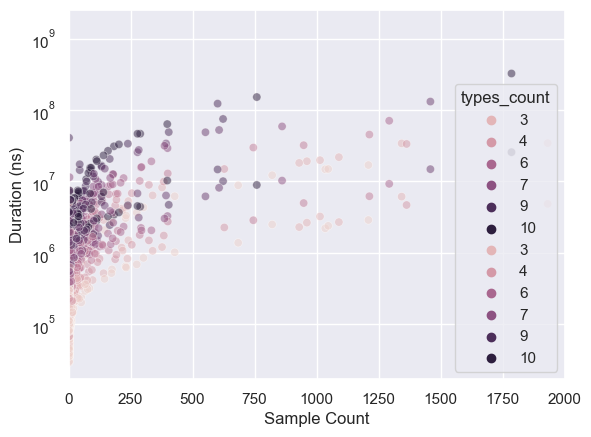

In [ ]:
sns.scatterplot(non_nan_results, x="leaf_count", y="bdmm_duration", alpha=0.5, hue="types_count")
sns.scatterplot(non_nan_results, x="leaf_count", y="flow_duration", alpha=0.5, hue="types_count")

plt.yscale('log')

plt.xlim(0, 2000)

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration (ns)')

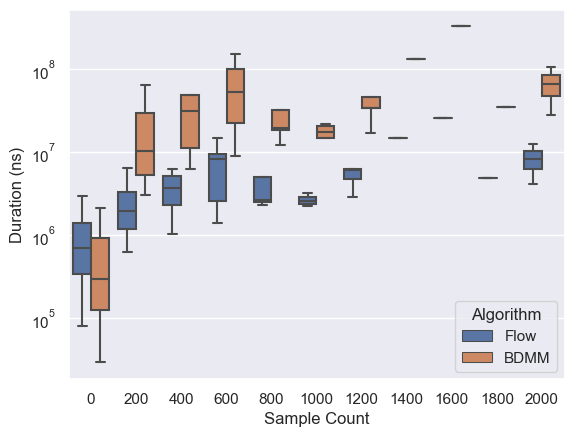

In [ ]:
non_nan_durations["binned_leaves"] = non_nan_durations["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    non_nan_durations[non_nan_durations["binned_leaves"] < 2200], 
    x="binned_leaves", y="duration", hue="algorithm",
    showfliers=False
)

legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(legend_handles, ["Flow", "BDMM"], title="Algorithm")

plt.yscale('log')

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration Flow (ns)')

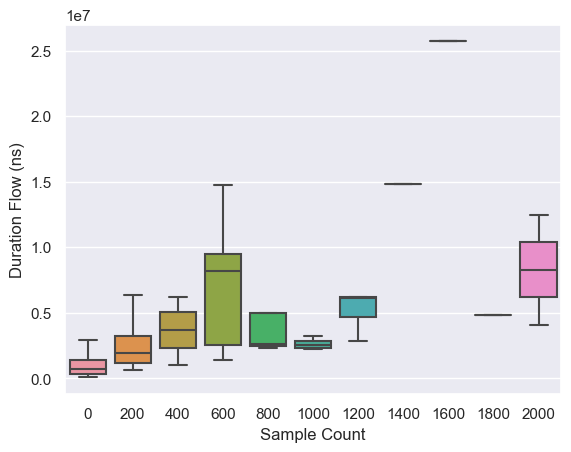

In [ ]:
results["binned_leaves"] = results["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    results[(results["binned_leaves"] < 2200)], 
    x="binned_leaves", y="flow_duration",
    showfliers=False
)

plt.xlabel('Sample Count')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration BDMM (ns)')

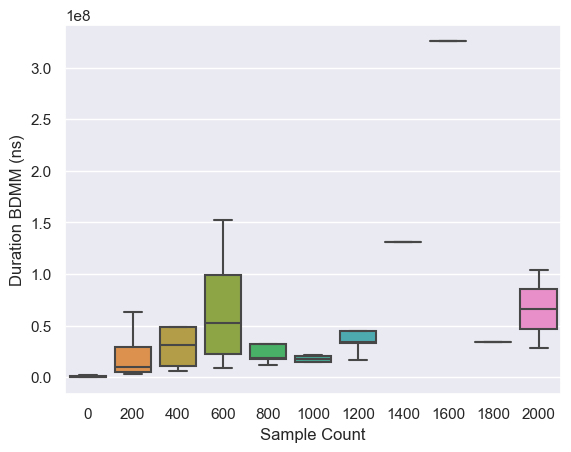

In [ ]:
results["binned_leaves"] = results["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    results[(results["binned_leaves"] < 2200)], 
    x="binned_leaves", y="bdmm_duration",
    showfliers=False
)

plt.xlabel('Sample Count')
plt.ylabel('Duration BDMM (ns)')

Text(0, 0.5, 'Duration (ns)')

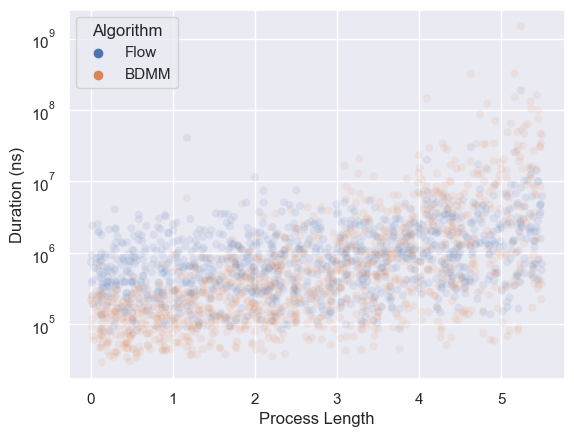

In [ ]:
ax = sns.scatterplot(
    non_nan_durations, 
    x="process_length", y="duration", hue="algorithm",
    alpha=0.1
)

legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(legend_handles, ["Flow", "BDMM"], title="Algorithm")

plt.yscale('log')

plt.xlabel('Process Length')
plt.ylabel('Duration (ns)')

In [ ]:
results.sort_values("node_count", ascending=False).head(10)

,node_count,leaf_count,types_count,process_length,flow_likelihood,flow_duration,bdmm_likelihood,bdmm_duration,use_intervals,min_num_intervals,integrator,useRandomInitial,binned_leaves
998,85999,43000,5,5.240360,-453342.544492,188375333,-453342.540211,1488173583,False,8,DormandPrince54Integrator,False,43000
572,21073,10537,2,4.095279,-86529.665484,20120458,-86529.663168,145033000,False,8,DormandPrince54Integrator,True,10400
468,5839,2920,5,5.447949,-24048.918775,9937084,-24048.918478,98649000,False,8,DormandPrince54Integrator,True,2800
458,5437,2719,9,4.627736,-24477.761396,30049667,-24477.761229,320531667,True,8,DormandPrince54Integrator,False,2600
306,5281,2641,7,5.432254,-23500.277968,14200625,-23500.277755,160785917,False,8,DormandPrince54Integrator,False,2600
917,5029,2515,5,4.741947,-22167.355510,7835083,-22167.355557,87245583,False,8,DormandPrince54Integrator,True,2400
66,4883,2442,4,5.119922,-19020.773204,8949750,-19020.772731,65061959,False,8,DormandPrince54Integrator,False,2400
842,4709,2355,2,5.474129,-18136.262817,4723834,-18136.262567,30448375,True,8,DormandPrince54Integrator,True,2200
928,4341,2171,6,5.366164,-18382.621667,12491792,-18382.621364,104176625,True,8,DormandPrince54Integrator,False,2000
1086,4139,2070,2,4.342944,-13938.673694,4099416,-13938.673266,28104000,False,8,DormandPrince54Integrator,True,2000


Text(0, 0.5, 'Duration Flow (ns)')

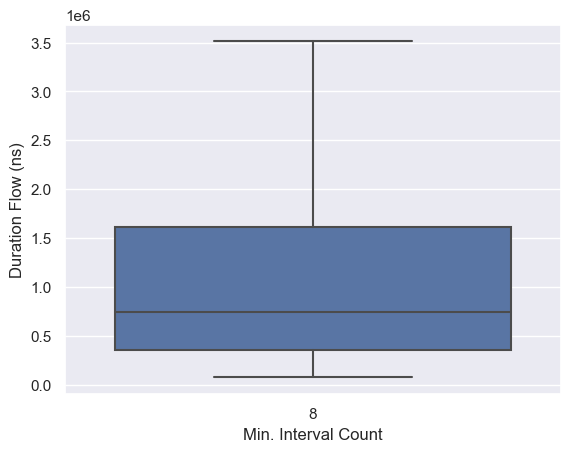

In [ ]:
ax = sns.boxplot(
    results, 
    x="min_num_intervals", y="flow_duration",
    showfliers=False
)

plt.xlabel('Min. Interval Count')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration Flow (ns)')

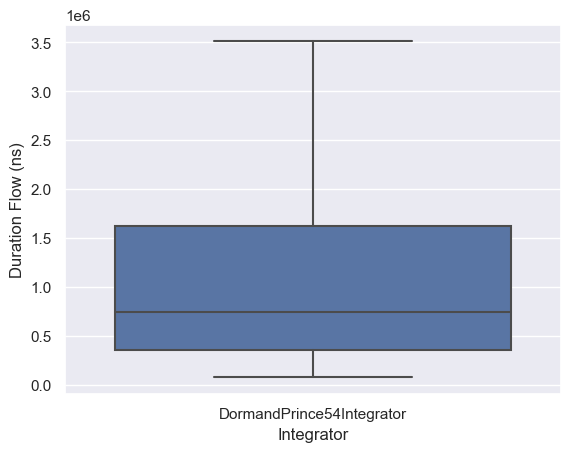

In [ ]:
ax = sns.boxplot(
    results, 
    x="integrator", y="flow_duration",
    showfliers=False
)

plt.xlabel('Integrator')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration Flow (ns)')

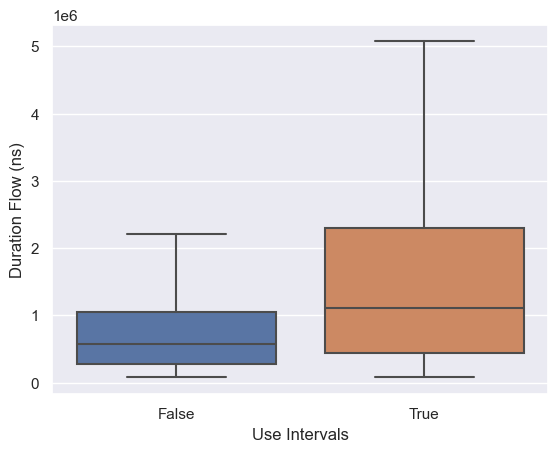

In [ ]:
ax = sns.boxplot(
    results, 
    x="use_intervals", y="flow_duration",
    showfliers=False
)

plt.xlabel('Use Intervals')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration (ns)')

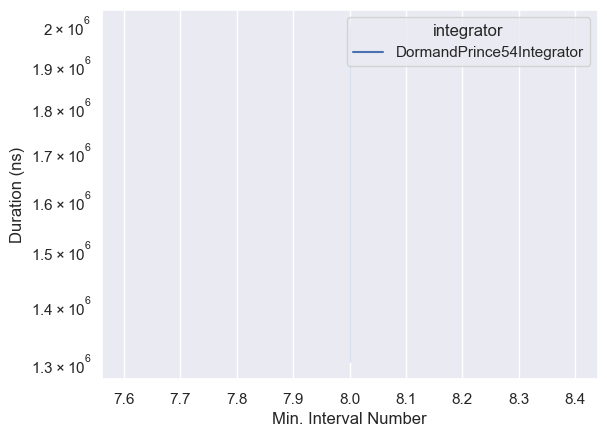

In [ ]:
sns.lineplot(non_nan_results, x="min_num_intervals", y="flow_duration", alpha=1.0, hue="integrator")

plt.yscale('log')

plt.xlabel('Min. Interval Number')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration Flow (ns)')

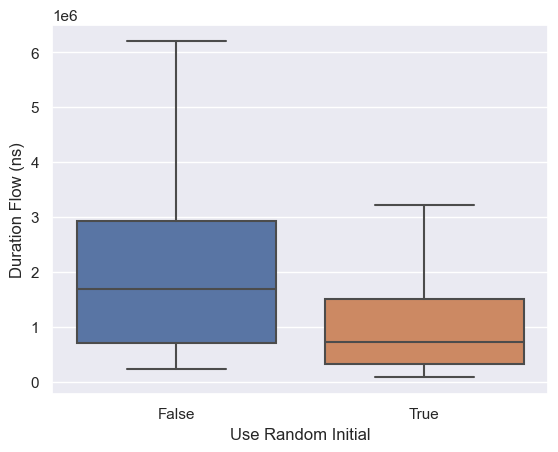

In [ ]:
ax = sns.boxplot(
    results[results["use_intervals"]], 
    x="useRandomInitial", y="flow_duration",
    showfliers=False
)

plt.xlabel('Use Random Initial')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration Flow (ns)')

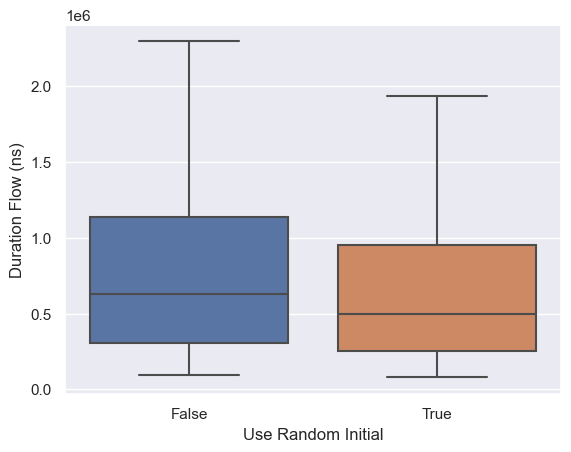

In [ ]:
ax = sns.boxplot(
    results[~results["use_intervals"]], 
    x="useRandomInitial", y="flow_duration",
    showfliers=False
)

plt.xlabel('Use Random Initial')
plt.ylabel('Duration Flow (ns)')

Text(0, 0.5, 'Duration (ns)')

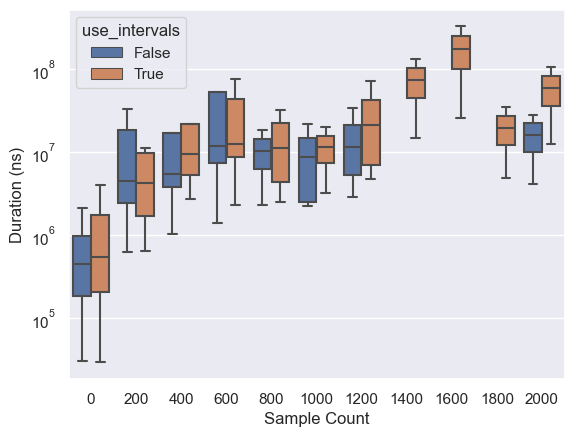

In [ ]:
non_nan_durations["binned_leaves"] = non_nan_durations["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    non_nan_durations[non_nan_durations["binned_leaves"] < 2200], 
    x="binned_leaves", y="duration", hue="use_intervals",
    showfliers=False
)

plt.yscale('log')

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')

Text(0, 0.5, 'Duration (ns)')

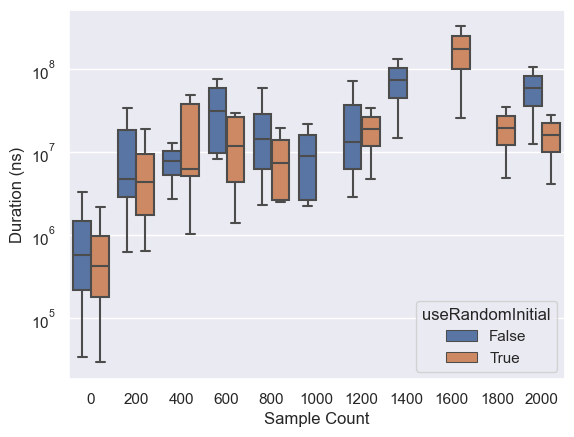

In [ ]:
non_nan_durations["binned_leaves"] = non_nan_durations["leaf_count"].map(lambda x: x // 200 * 200)

ax = sns.boxplot(
    non_nan_durations[non_nan_durations["binned_leaves"] < 2200], 
    x="binned_leaves", y="duration", hue="useRandomInitial",
    showfliers=False
)

plt.yscale('log')

plt.xlabel('Sample Count')
plt.ylabel('Duration (ns)')